# PSP SPAN-I VDF Plotting Examples

This notebook demonstrates how to create beautiful Velocity Distribution Function (VDF) plots using Plotbot's `vdyes()` function.

## What You'll Learn:
- How to use `vdyes()` for PSP SPAN-I VDF plotting
- Parameter system for customizing VDF plots (smart bounds, colormaps, axis limits)
- Different VDF views: theta-plane, phi-plane, and collapsed distributions
- Real examples with PSP solar wind data showing the "hammerhead" distribution

## About VDFs:
Velocity Distribution Functions show how particles are distributed in velocity space. For PSP SPAN-I:
- **Theta-plane**: Vx vs Vz
- **Phi-plane**: Vx vs Vy (azimuthal velocity space)
- **Collapsed**: 1D distribution summed over angles



The VDF integration into plotbot reproduces figures detailed in https://github.com/jlverniero/PSP_Data_Analysis_Tutorials/blob/main/PSP_SPAN-I_VDF_Plot_Tutorial.ipynb

In [1]:
# Import Plotbot
from plotbot import *

print("🚀 PSP SPAN-I VDF Plotting Demo")
print("Using vdyes() - VDF plotting the fine way!")


initialized server_access
initialized global_tracker
initialized ploptions
initialized plot_manager
initialized epad class
initialized epad_hr class
initialized proton class
initialized proton_hr class
initialized ham_class
initialized psp_alpha class
initialized psp_qtn class
initialized psp_orbit class
initialized psp_span_vdf class
initialized data_cubby.
CDF classes added to data_cubby type map.
initialized proton_fits class
initialized alpha_fits class
🔉 initialized audifier

Importing libraries, this may take a moment. Hold tight... 

✅ Imported standard libraries and utilities.
✅ Imported numpy, pandas, and scipy libraries.
✅ Imported matplotlib libraries.
✅ Imported cdflib, BeautifulSoup, requests, dateutil, and datetime libraries.

🤖 Plotbot Initialized
✨ Showdahodo initialized
Positional Data Helper Initialized
📈📉 Multiplot Initialized

🤖 Plotbot Initialized
📈📉 Multiplot Initialized
   Version: 2025_08_26_v3.16
   Commit: v3.16 Develop: Plotly VDF interactive implementation -

## 1. Basic VDF Plotting

The simplest way to create VDF plots is with `vdyes(trange)`:

```python
# Basic usage (uses default parameters)
fig = vdyes(['2020/01/29 00:00:00.000', '2020/01/30 00:00:00.000'])
```

This creates a 3-panel plot with:
- Left: 1D collapsed VDF
- Middle: Theta-plane (Vx vs Vz) 
- Right: Phi-plane (Vx vs Vy)


In [2]:
print_manager.show_status = False

27-Aug-25 15:02:29: Local files found: ['data/psp/sweap/spi/l2/spi_sf00_8dx32ex8a/2020/psp_swp_spi_sf00_l2_8dx32ex8a_20200129_v04.cdf', 'data/psp/sweap/spi/l3/spi_sf00_l3_mom/2020/psp_swp_spi_sf00_L3_mom_20200129_v04.cdf']


📊 Example 1: Basic VDF Plot
Using default parameters...
🎛️ VDF Text Scaling: 1.5
✅ VDF plot created!
This shows PSP solar wind proton distributions
Look for the characteristic 'hammerhead' shape in the theta-plane


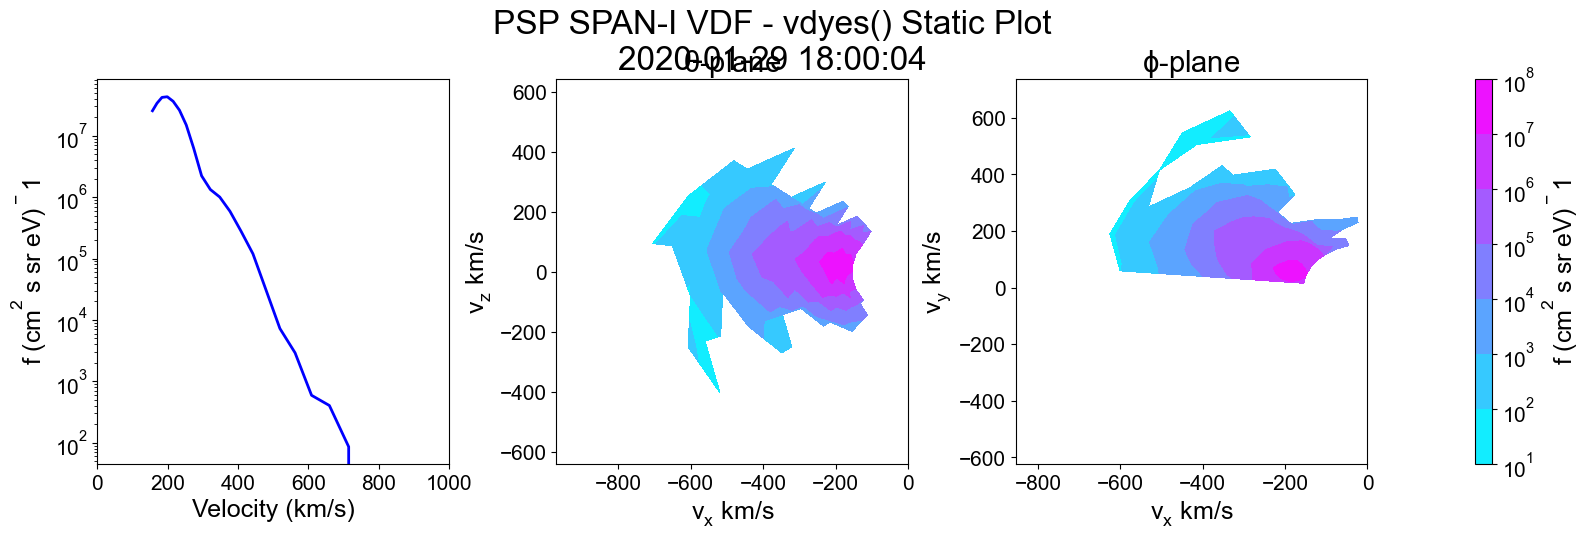

In [6]:
# Example 1: Basic VDF plot with default settings
print("📊 Example 1: Basic VDF Plot")
print("Using default parameters...")

# Create basic VDF plot
# trange = ['2020/01/29 18:00:00.000', '2020/01/29 18:02:00.000']
trange = ['2020/01/29 18:00:04.000']
fig = vdyes(trange)

print("✅ VDF plot created!")
print("This shows PSP solar wind proton distributions")
print("Look for the characteristic 'hammerhead' shape in the theta-plane")

##------->> 🌟 LOOK in your bottom application bar for the CHANGE SAVE DIRECTORY dialogue box 🌟 <<------

## 2. VDF Parameter System

VDF plots are controlled by parameters set on the global `psp_span_vdf` instance, just like other Plotbot classes:

```python
# Set parameters before calling vdyes()
psp_span_vdf.parameter_name = value
fig = vdyes(trange)
```

### Available Parameters:

#### Smart Bounds System (Auto-Zoom):
- `enable_smart_padding` - Enable intelligent auto-zoom (True/False)
- `theta_smart_padding` - Single padding for theta-plane (square, zero-centered)
- `phi_x_smart_padding` - Vx padding for phi-plane (km/s) 
- `phi_y_smart_padding` - Vy padding for phi-plane (km/s)
- `phi_peak_centered` - If True, centers phi bounds on density peak (fixes FOV cutoff)  
- `enable_zero_clipping` - Auto-clip X at zero when bulk is one-sided (preserves phi Y)

#### Manual Axis Limits (Override Smart Bounds):
- `theta_x_axis_limits` - Manual X-axis for theta-plane, e.g., (-800, 0)
- `theta_y_axis_limits` - Manual Y-axis for theta-plane, e.g., (-400, 400)
- `phi_x_axis_limits` - Manual X-axis for phi-plane
- `phi_y_axis_limits` - Manual Y-axis for phi-plane

#### Visual Settings:
- `vdf_colormap` - Colormap: 'cool', 'viridis', 'plasma', 'jet', etc.


In [4]:

# Example 2: Custom Smart Bounds (with peak-centered phi)
print("📊 Example 2: Custom Smart Bounds")
print("Demonstrating smart padding control...")

trange = ['2020/01/29 18:00:00.000', '2020/01/29 18:20:00.000']
# trange = ['2020/01/29 18:10:00.000', '2020/01/29 18:20:00.000']

# Clear all manual limits
psp_span_vdf.theta_x_axis_limits = None
psp_span_vdf.theta_y_axis_limits = None
psp_span_vdf.phi_x_axis_limits = None
psp_span_vdf.phi_y_axis_limits = None

# Configure smart bounds
psp_span_vdf.enable_smart_padding = True
psp_span_vdf.theta_smart_padding = 300     # Square, zero-centered theta
psp_span_vdf.phi_x_smart_padding = 300     # Phi paddings around peak
psp_span_vdf.phi_y_smart_padding = 300
psp_span_vdf.phi_peak_centered = True      # Center phi on density peak
psp_span_vdf.enable_zero_clipping = True   # Clamp X at zero when one-sided
psp_span_vdf.vdf_colormap = 'cool'

# Configure plot size (NEW!)
psp_span_vdf.vdf_figure_width = 18         # Larger width for better visibility (default: 15)
psp_span_vdf.vdf_figure_height = 5         # Taller height for better aspect ratio (default: 5)
psp_span_vdf.vdf_text_scaling = 1.5        #Increase text size (default: 1.0)

print("✅ Smart bounds configured:")
print(f"   Theta padding: {psp_span_vdf.theta_smart_padding} km/s (square, zero-centered)")
print(f"   Phi padding: X={psp_span_vdf.phi_x_smart_padding}, Y={psp_span_vdf.phi_y_smart_padding} km/s")
print(f"   🎯 Phi peak-centered: {psp_span_vdf.phi_peak_centered}")
print(f"   Zero clipping: {psp_span_vdf.enable_zero_clipping}")
print(f"   Colormap: {psp_span_vdf.vdf_colormap}")

# Create plot
fig = vdyes(trange)

print("✅ VDF plot with custom smart bounds created!")
print("Notice the tighter zoom focusing on the bulk data distribution")


26-Aug-25 22:03:20: Local files found: ['data/psp/sweap/spi/l2/spi_sf00_8dx32ex8a/2020/psp_swp_spi_sf00_l2_8dx32ex8a_20200129_v04.cdf', 'data/psp/sweap/spi/l3/spi_sf00_l3_mom/2020/psp_swp_spi_sf00_L3_mom_20200129_v04.cdf']


📊 Example 2: Custom Smart Bounds
Demonstrating smart padding control...
✅ Smart bounds configured:
   Theta padding: 300 km/s (square, zero-centered)
   Phi padding: X=300, Y=300 km/s
   🎯 Phi peak-centered: True
   Zero clipping: True
   Colormap: cool
🔗 Button handlers connected successfully


✅ VDF plot with custom smart bounds created!
Notice the tighter zoom focusing on the bulk data distribution


In [5]:
# Example 3: Manual Axis Control (Jaye's Original Bounds)

# ⭐️ NOTE: Applying new axis limits is going to OVERRIDE the settings of previously generated widgets (e.g. the one above).
#         Ideally you should plan to work with one widget at a time. Uncomment to render this example.

# print("📊 Example 3: Manual Axis Limits")
# print("Using Jaye's original bounds for comparison...")

# # Reset to use manual limits (overrides smart bounds)
# psp_span_vdf.enable_smart_padding = False  # Disable smart bounds
# psp_span_vdf.theta_x_axis_limits = (-800, 0)    # Jaye's theta-plane X bounds
# psp_span_vdf.theta_y_axis_limits = (-400, 400)  # Jaye's theta-plane Y bounds
# psp_span_vdf.phi_x_axis_limits = (-800, 0)      # Jaye's phi-plane X bounds  
# psp_span_vdf.phi_y_axis_limits = (-200, 600)    # Jaye's phi-plane Y bounds

# print("✅ Manual axis limits set (Jaye's original):")
# print(f"   Theta-plane: X={psp_span_vdf.theta_x_axis_limits}, Y={psp_span_vdf.theta_y_axis_limits}")
# print(f"   Phi-plane: X={psp_span_vdf.phi_x_axis_limits}, Y={psp_span_vdf.phi_y_axis_limits}")

# # Create plot with Jaye's exact bounds
# fig = vdyes(trange)

# print("✅ VDF plot with Jaye's original bounds created!")
# print("This reproduces the exact view from the original SPAN-I tutorial")